In [1]:
#Import libraries and csv file
%pylab inline
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

titanic_df = pd.read_csv('titanic-data.csv')

#Check if NaN values are present
titanic_df.isnull()

Populating the interactive namespace from numpy and matplotlib


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,True,False
7,False,False,False,False,False,True,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


### Data Cleanup and Filtering:

From the correlation data, the following relationships were observed:
- Missing Age values (NaN) which are Missing at Random make-up a significant portion of the data ~19.86% hence, Listwise Deletion is not applicable
- It will be hard to estimate or use Regression Substitution as no patterns were observed. Even if the passengers were related, their ages were not necessary similar
- Therefore, I would opt to replace NaN values with the average age of passengers who were above 13 years old (~29.7) as it seems less likely to bring pre-teens due to care-taking, age and other barrier issues
- I understand that this may not be the best option but given the conditions of the data, I believe this will be a suitable solution
- Replace string values for 'Sex' column with 1 (Male) and 0 (Female)
- Remove columns; Cabin and Embarked 
- Use .corr function to determine relations between variables
- Survivial has positive relations with Age, Parch and Fare while Pclass and Fare can be correlated

In [2]:
#Replacing NaN valuses with 29.7
titanic_df['Age'].fillna(29.7, inplace=True)

#Check if replacemnt was done correctly
titanic_df.loc[861, :]
titanic_df

#Create new DF with columns Cabin and Embarked removed as they do not have any relations to surviability
#Place of embark has no effect
#While cabin locations should have an impact depending on where they are placed on the ship, this information is missing
titanic_df_filtered_columns = titanic_df[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare']]
titanic_df_filtered_columns

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625
3,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500
4,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000
5,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000
6,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208
7,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,29.7,1,0,PC 17569,146.5208
8,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708
9,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000


In [3]:
#Replace male with '1' and female with '0' for correlation calculations
replace_sex_string = titanic_df_filtered_columns.replace(['male','female'], [1,0])

In [4]:
#Generate summary statistics
replace_sex_string.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699293,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,29.700000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#Check for correlations between variables
replace_sex_string.corr(method='pearson')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033206,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069811,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331334,0.083081,0.018443,-0.549500
Sex,0.042939,-0.543351,0.131900,1.000000,0.084155,-0.114631,-0.245489,-0.182333
Age,0.033206,-0.069811,-0.331334,0.084155,1.000000,-0.232624,-0.179194,0.091563
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232624,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.179194,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091563,0.159651,0.216225,1.000000


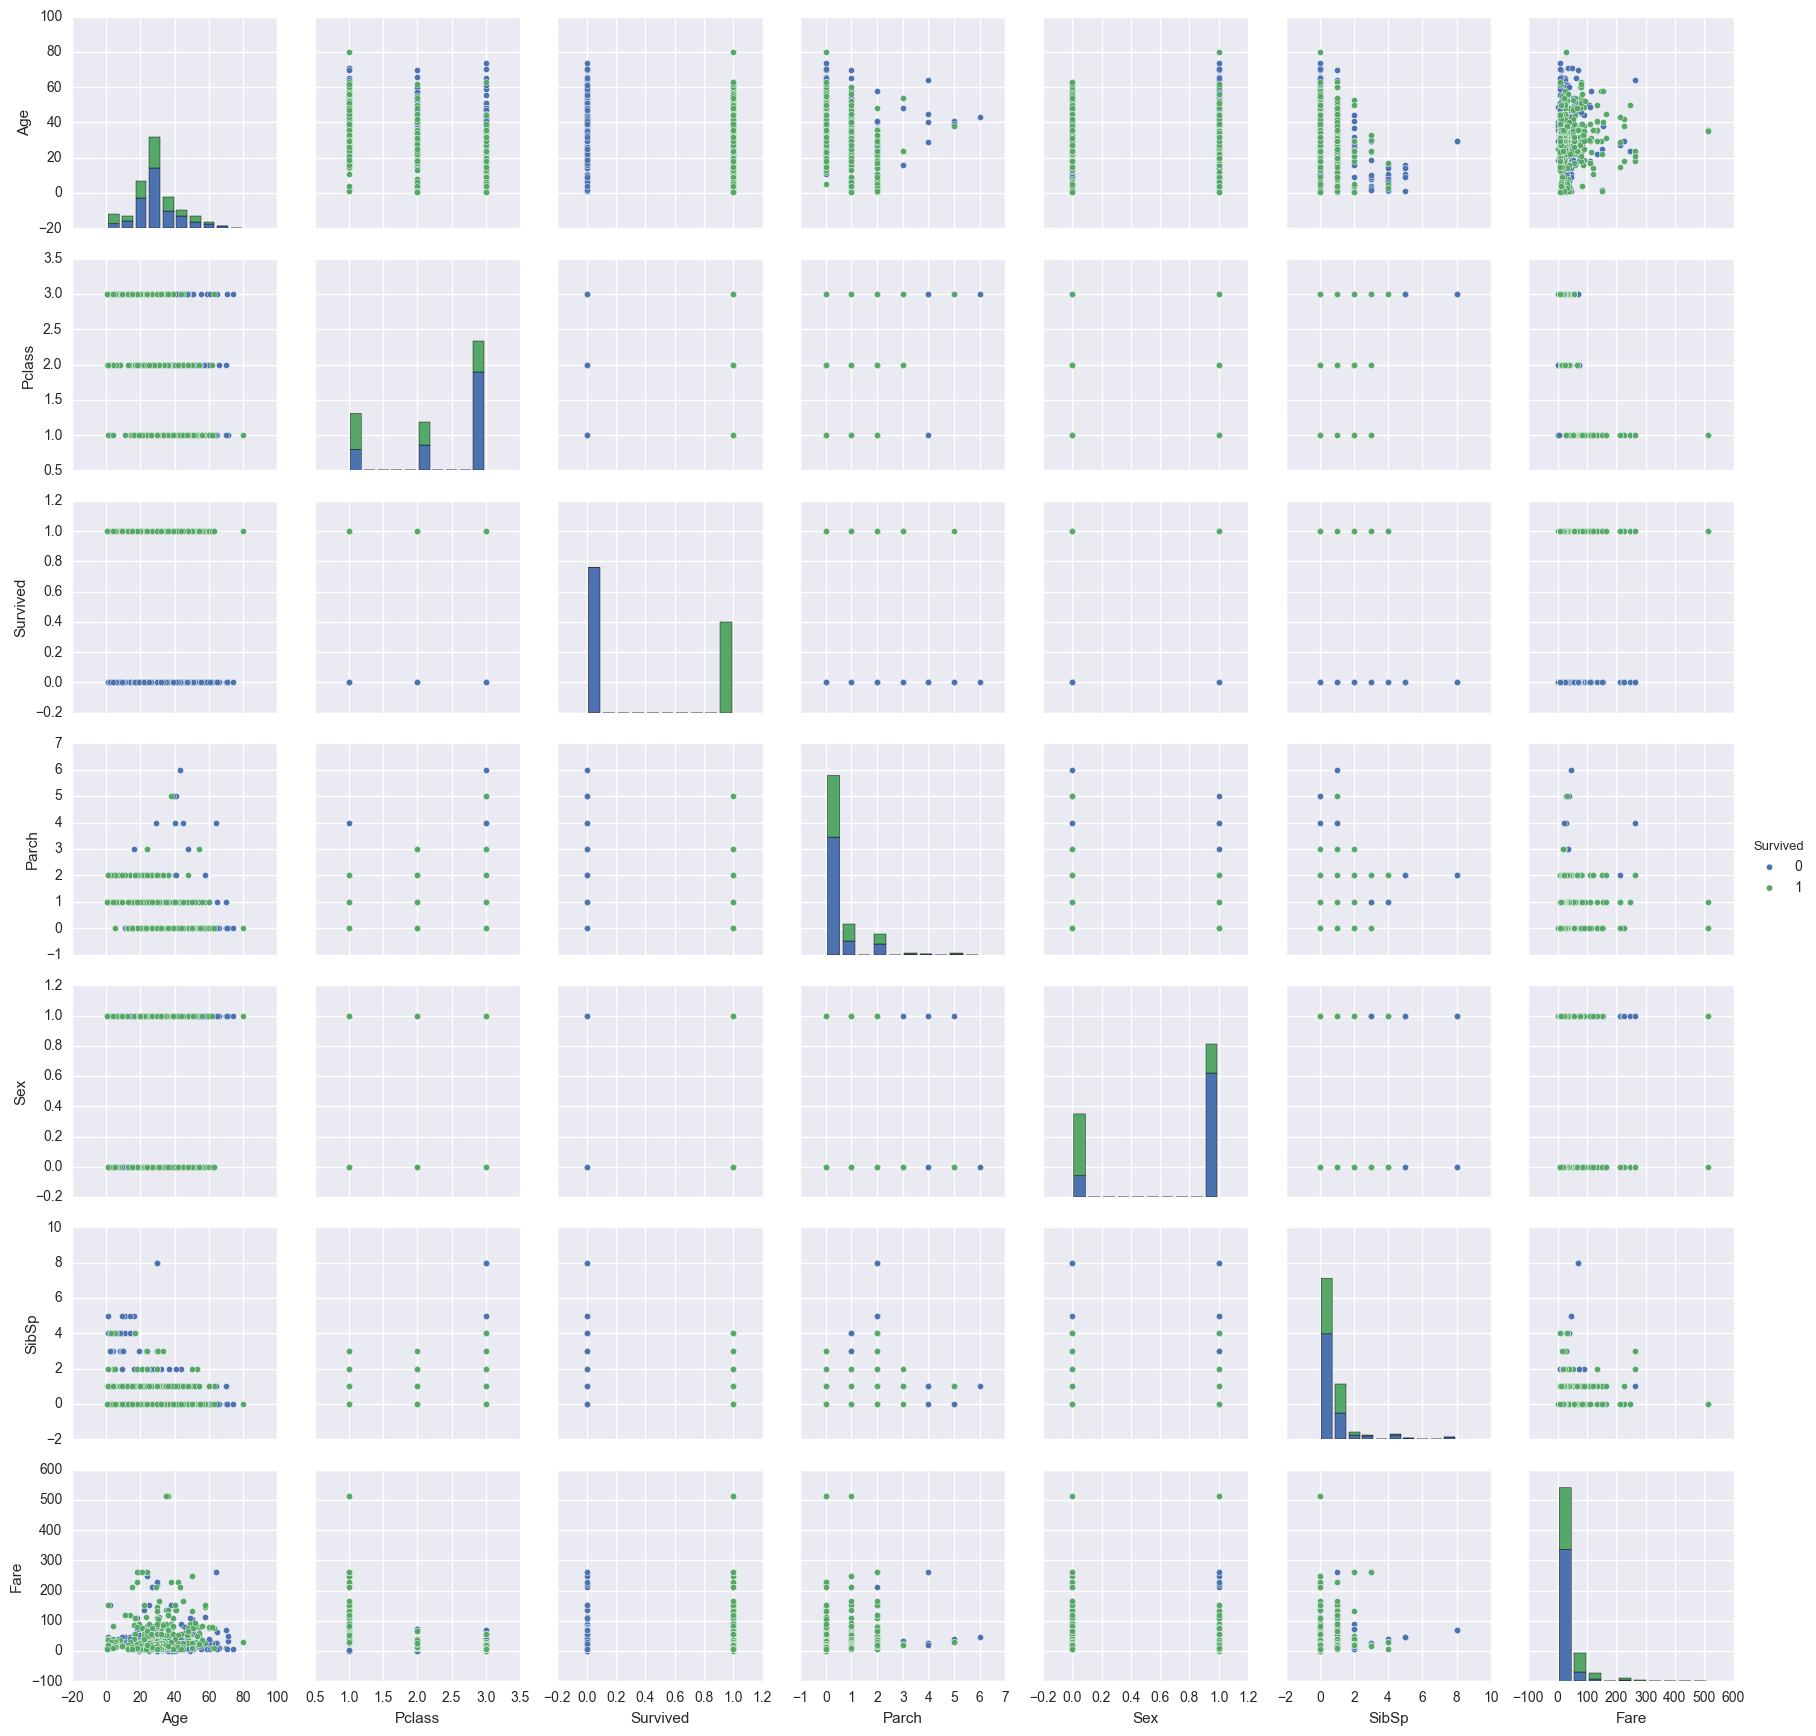

In [17]:
sb.pairplot(replace_sex_string[['Age', 'Pclass', 'Survived', 'Parch', 'Sex', 'SibSp', 'Fare']], hue='Survived')

### Questions:

- 1) What do the survivors have in common
- 2) What factors made people more likely to survive
- 3) How does Parch (Correlation ~0.082) and Fare (Correlation ~0.26) affect survivability

In [6]:
#For survivors, 233 are female, 109 are male, total 342 (Less than 50%). 81 female and 468 male passengers perished
replace_sex_string.groupby(['Sex', 'Survived'], as_index=False).count()

,Sex,Survived,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare
0,0,0,81,81,81,81,81,81,81,81
1,0,1,233,233,233,233,233,233,233,233
2,1,0,468,468,468,468,468,468,468,468
3,1,1,109,109,109,109,109,109,109,109


In [7]:
#Group data by Age
#Rationale for the plot is to check for patterns and assumed guesses 
#For example, casualties should occur at a higher frequency in older passengers due to their health conditions
for_plot_age = replace_sex_string.groupby(['Age'], as_index=False).mean()
for_plot_age

,Age,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0.42,804.000000,1.000000,3.000000,1.000000,0.000000,1.000000,8.516700
1,0.67,756.000000,1.000000,2.000000,1.000000,1.000000,1.000000,14.500000
2,0.75,557.500000,1.000000,3.000000,0.000000,2.000000,1.000000,19.258300
3,0.83,455.500000,1.000000,2.000000,1.000000,0.500000,1.500000,23.875000
4,0.92,306.000000,1.000000,1.000000,1.000000,1.000000,2.000000,151.550000
5,1.00,415.428571,0.714286,2.714286,0.714286,1.857143,1.571429,30.005957
6,2.00,346.900000,0.300000,2.600000,0.400000,2.100000,1.300000,37.536250
7,3.00,272.000000,0.833333,2.500000,0.666667,1.833333,1.333333,25.781950
8,4.00,466.100000,0.700000,2.600000,0.500000,1.600000,1.400000,29.543330
9,5.00,380.000000,1.000000,2.750000,0.000000,1.750000,1.250000,22.717700


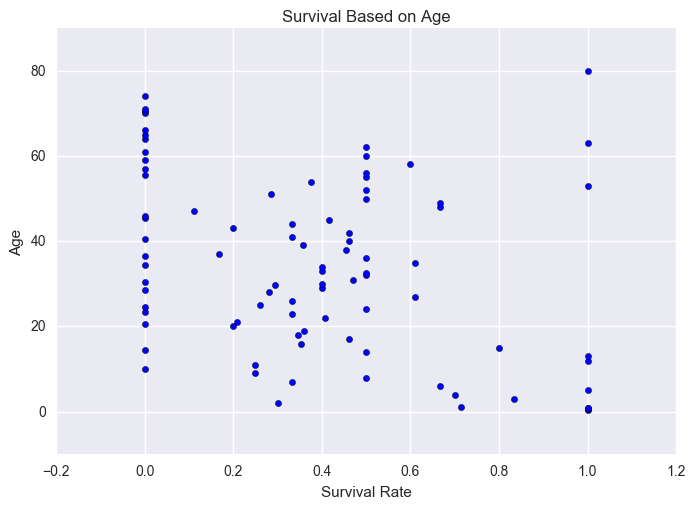

In [8]:
#Plotting Survived against Age
#Seems that for both survivors and casualties, there were occurences across the age groups
#However for casualties, it was noticed for having passengers in older ages (~60 to 70+)
#It can be assumed that passengers of older age would have difficulties moving and hence, escaping from the ship
plt.title('Survival Based on Age')
plt.ylabel('Age')
plt.xlabel('Survival Rate')
plt.scatter(for_plot_age['Survived'], for_plot_age['Age'])

In [9]:
#Group data by Parch
#Rationale is to determine how much this variable affects survival
#For example, passengers with higher Parch should have an easier time escaping with the aid of more family members
#However, it is unclear on how to differentiate the exact number of Parents and Children
for_plot_parch = replace_sex_string.groupby(['Parch'], as_index=False).mean()
for_plot_parch

,Parch,PassengerId,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,445.255162,0.343658,2.321534,0.713864,31.604572,0.237463,25.586774
1,1,465.110169,0.550847,2.203390,0.491525,24.779831,1.084746,46.778180
2,2,416.662500,0.500000,2.275000,0.387500,19.089375,2.062500,64.337604
3,3,579.200000,0.600000,2.600000,0.200000,33.200000,1.000000,25.951660
4,4,384.000000,0.000000,2.500000,0.500000,44.500000,0.750000,84.968750
5,5,435.200000,0.200000,3.000000,0.200000,39.200000,0.600000,32.550000
6,6,679.000000,0.000000,3.000000,0.000000,43.000000,1.000000,46.900000


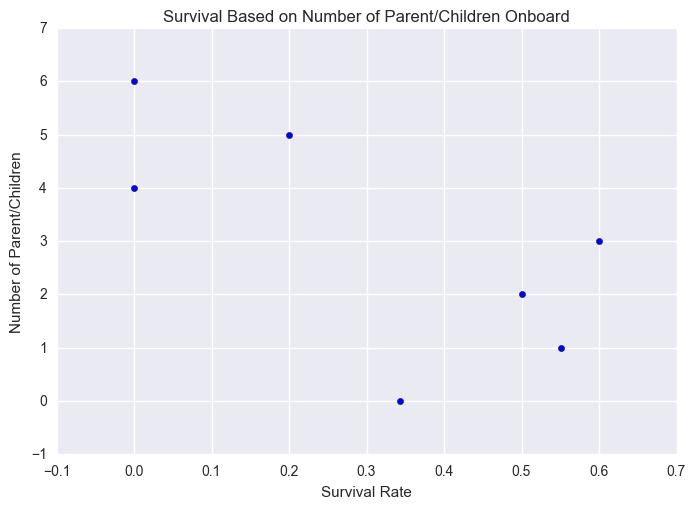

In [10]:
#Plotting Survived against Parch
#On average, the highest survival rate is from Parch = 3
#There were no survivors for Parch = 4 and 6
#Unable to observe any relations, it was originally expected that survivability will be higher as Parch goes up
plt.title('Survival Based on Number of Parent/Children Onboard')
plt.ylabel('Number of Parent/Children')
plt.xlabel('Survival Rate')
plt.scatter(for_plot_parch['Survived'], for_plot_parch['Parch'])

In [11]:
#Group data by Pclass
#Based on ship layout information, First Class Passenger facilities, enterances and cabins seemed nearer to the lifeboats
#Assumption is that being in first class provides better survival rates
check_relation = replace_sex_string.groupby(['Pclass'], as_index=False).mean()
check_relation

,Pclass,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare
0,1,461.597222,0.629630,0.564815,37.048241,0.416667,0.356481,84.154687
1,2,445.956522,0.472826,0.586957,29.867011,0.402174,0.380435,20.662183
2,3,439.154786,0.242363,0.706721,26.403503,0.615071,0.393075,13.675550


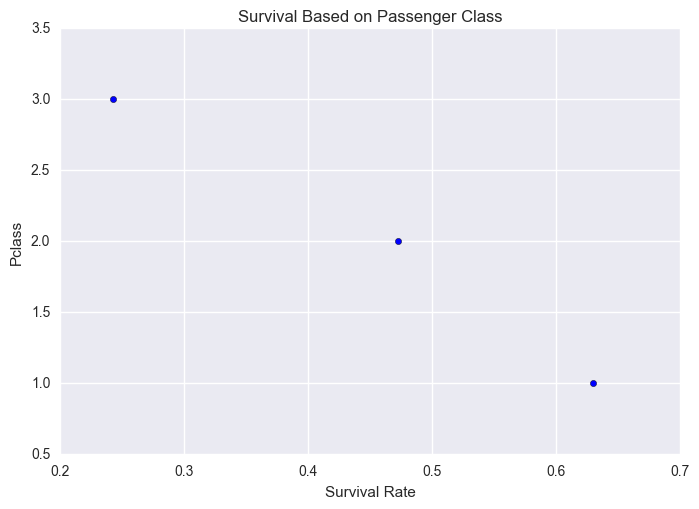

In [12]:
#Plotting Survived against Pclass
#Highest survival rates are Pclass 1 followed by 2 and 3
plt.title('Survival Based on Passenger Class')
plt.ylabel('Pclass')
plt.xlabel('Survival Rate')
plt.scatter(check_relation['Survived'], check_relation['Pclass'])

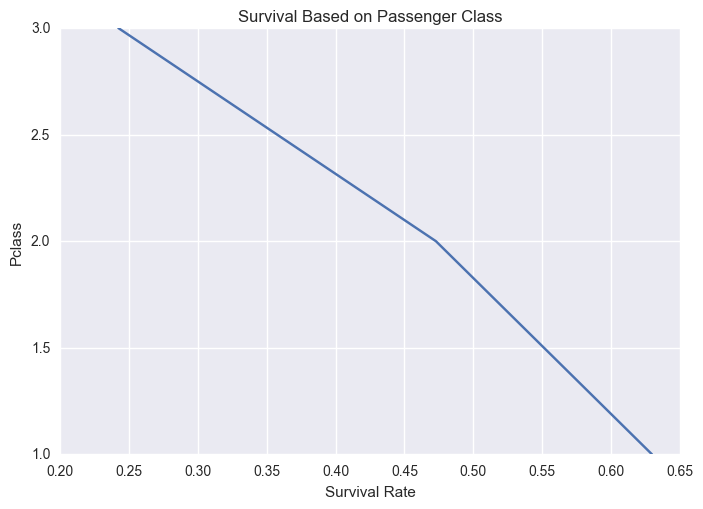

In [13]:
#Using a line graph to plot the relation between Passenger Class and Survival
plt.title('Survival Based on Passenger Class')
plt.ylabel('Pclass')
plt.xlabel('Survival Rate')
plt.plot(check_relation['Survived'], check_relation['Pclass'])

In [29]:
#Group data by Fare
#Rationale is to determine if Fare has any impact on survival
#Assumption is that Fare should coincide with Pclass with higher fares resulting in better classes
for_plot_fare = replace_sex_string.groupby(['Fare'], as_index=False).mean()
for_plot_fare

,Fare,Pclass,PassengerId,Survived,Sex,Age,SibSp,Parch
0,0.0000,1,668.800000,0.000000,1.000000,35.280000,0.000000,0.000000
1,0.0000,2,508.166667,0.000000,1.000000,29.700000,0.000000,0.000000
2,0.0000,3,338.250000,0.250000,1.000000,32.250000,0.000000,0.000000
3,4.0125,3,379.000000,0.000000,1.000000,20.000000,0.000000,0.000000
4,5.0000,1,873.000000,0.000000,1.000000,33.000000,0.000000,0.000000
5,6.2375,3,327.000000,0.000000,1.000000,61.000000,0.000000,0.000000
6,6.4375,3,844.000000,0.000000,1.000000,34.500000,0.000000,0.000000
7,6.4500,3,819.000000,0.000000,1.000000,43.000000,0.000000,0.000000
8,6.4958,3,287.500000,0.000000,1.000000,26.000000,0.500000,0.000000
9,6.7500,3,399.500000,0.000000,0.500000,18.500000,0.000000,0.000000


([<matplotlib.axis.XTick at 0xba43f60>,
 <a list of 3 Text xticklabel objects>)

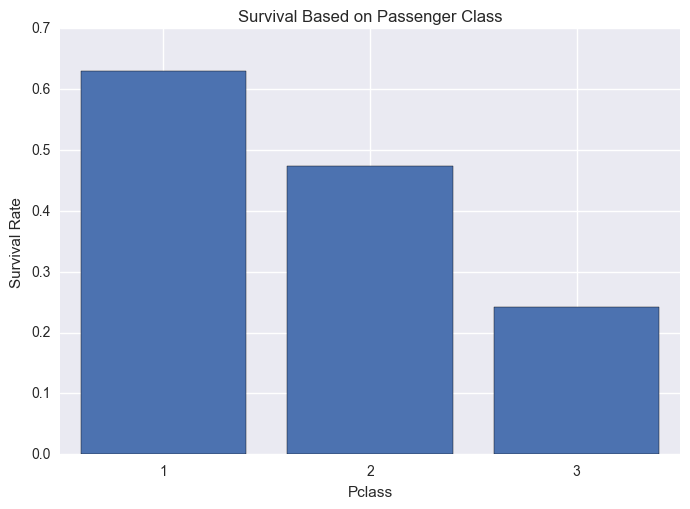

In [14]:
plt.bar(check_relation['Pclass'], check_relation['Survived'], align='center')
plt.title('Survival Based on Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Pclass')
plt.xticks(check_relation['Pclass'])

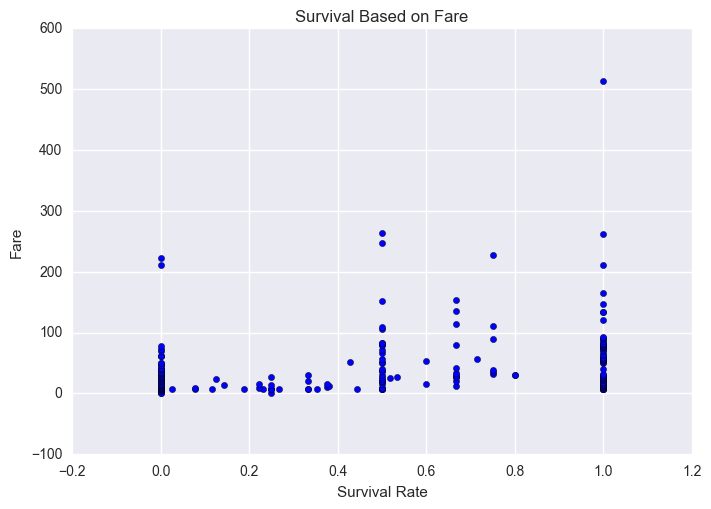

In [31]:
#Plotting Survived against Fare
#Most of the passengers seemed to have paid fares between ~0 to 100
#By conventional understandings, higher fares should equate to better classes and in turn, better survival
#But based on the plot, this does not seem to be the case
#Possible explaination could be that the fares were entered incorrectly as some entries were recorded as 0
plt.title('Survival Based on Fare')
plt.ylabel('Fare')
plt.xlabel('Survival Rate')
plt.scatter(for_plot_fare['Survived'], for_plot_fare['Fare'])

### Conclusions:

Based on information from https://www.kaggle.com/c/titanic/data and https://www.encyclopedia-titanica.org/titanic-deckplans/profile.html, the boat deck which contains the lifeboats was located at the top-level of the ship.

Relating it with the analysis, survivors have the following in common:
- Age: Relatively young and in their prime ~29.70
- Passenger Class: First Class passengers, were located closer to the life boats, increasing their survival chances

Majority of the survivors were from the First Class as their entrances and facilities were located near the boat deck. Making access easier compared to passengers from other class.
Age is also a factor as it will not be easy for senior passengers to navigate to the boat decks. Shown as majority of them did not survive.

However, neither relying on Passenger Class or Age alone is sufficient to guarantee survival. Passengers can be young but if they were located far from the boat deck, it would be hard for them to survive. Similarly for Passenger Class, purchasing First Class does not ensure survival.

Limitations:
- There was a huge disparity in the percentage of male and female passengers hence, it may be more ideal to replace the NaN age values with the average age of above 13 years old in their respective female and male groups rather than using 29.7 which is an overview value

- Number of Parent and Children were combined into a single variable making analysis harder. If they were separated, it would be possible to determine if the passenger was a parent or child and from there, more complex relations such as if the passgenger was a parent, what was the threshold number of children brought along for survival

- In the above Passenger Class and Fare plot, the assumption that higher fares results in better classes was not reached. From the data, first class passengers paid between 0 to 512.33 dollars which does not seem logical. This could be due to entry error or purchases for multiple tickets but as the prices varies too much and without pricing information, it would be impossible to determine

- If cabin information was provided and filled, we can use them to determine which cabins have better survival rates

Hypothesis:
Personally, I will correlate that Passenger Class has the highest impact on survival.
The number of first class passengers make-up about 24% of the total but, they have the highest survival rate.

Perhaps a One-Sample T-Test could be ran using mean survival rate of first class passengers and the population to analyze further.